In [1]:
import numpy as np
import cv2 as cv
import math
from matplotlib import pyplot as plt
from PIL import Image

argv = None
filename = '/Users/sierra/Downloads/graph.jpeg'

 # Loads an image
src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_GRAYSCALE)
    
dst = cv.Canny(src, 50, 200, None, 3)
 
 # Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)
lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
"""
# Draw the lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)"""

'\n# Draw the lines\nif lines is not None:\n    for i in range(0, len(lines)):\n        rho = lines[i][0][0]\n        theta = lines[i][0][1]\n        a = math.cos(theta)\n        b = math.sin(theta)\n        x0 = a * rho\n        y0 = b * rho\n        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))\n        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))\n        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)'

In [2]:
"""plt.imshow(cdst)
plt.show()"""

'plt.imshow(cdst)\nplt.show()'

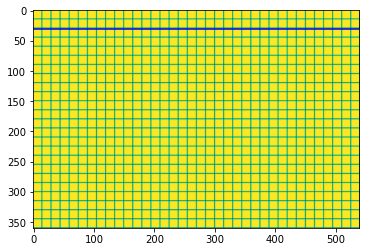

In [3]:

linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        #print((l[0], l[2]), (l[1], l[3]))
        plt.plot((l[0], l[2]), (l[1], l[3]), color = "b")
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
        break
    plt.imshow(src)
    plt.show()
cv.imshow("Source", src)
#cv.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
cv.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)

#cv.waitKey()


In [4]:
print(linesP)

[[[  0  30 539  30]]

 [[  0 300 539 300]]

 [[  0 105 539 105]]

 [[  0 210 539 210]]

 [[  0 120 539 120]]

 [[  0 150 539 150]]

 [[  0 285 539 285]]

 [[  0  13 539  13]]

 [[  0 343 539 343]]

 [[  0 240 539 240]]

 [[  0 283 539 283]]

 [[  0  15 539  15]]

 [[  0  73 539  73]]

 [[  0 268 539 268]]

 [[  0 178 539 178]]

 [[  0  58 539  58]]

 [[  0  90 539  90]]

 [[  0 118 539 118]]

 [[  0 328 539 328]]

 [[  0 270 539 270]]

 [[  0 133 539 133]]

 [[  0  75 539  75]]

 [[  0 253 539 253]]

 [[  0 208 539 208]]

 [[  0 148 539 148]]

 [[  0  60 539  60]]

 [[  0 193 539 193]]

 [[  0 103 539 103]]

 [[  0 345 539 345]]

 [[  0 330 539 330]]

 [[  0 315 539 315]]

 [[  0 180 539 180]]

 [[  0 163 539 163]]

 [[  0  43 539  43]]

 [[  0 195 539 195]]

 [[  0  28 539  28]]

 [[  0 313 539 313]]

 [[  0  45 539  45]]

 [[  0 135 539 135]]

 [[  0 225 539 225]]

 [[  0 298 539 298]]

 [[  0 223 539 223]]

 [[  0  88 539  88]]

 [[  0 165 539 165]]

 [[  0 238 539 238]]

 [[  0 255

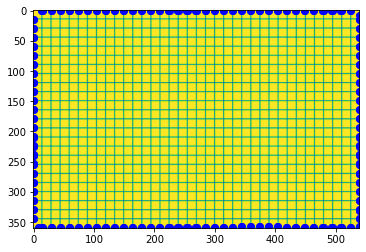

In [5]:

linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)


vertical = []
horizontal = []
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        #print((l[0], l[2]), (l[1], l[3]))
        # horizontal lines
        if l[1] - l[3] == 0: # may not be zero! but may be close - adjust as needed
            horizontal.append([(l[0], l[1]), (l[2], l[3])])
        
        # vertical lines
        elif l[0] - l[2] == 0:
            vertical.append([(l[0], l[1]), (l[2], l[3])])
        
        plt.scatter((l[0], l[2]), (l[1], l[3]), color = "b")
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

    plt.imshow(src)
    plt.show()


In [6]:
np.shape(horizontal)

(48, 2, 2)

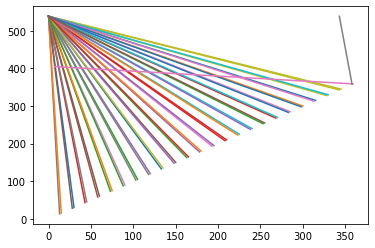

In [7]:
h_shape = np.shape(horizontal)

for i in range(h_shape[0]):
    plt.plot(*horizontal[i])

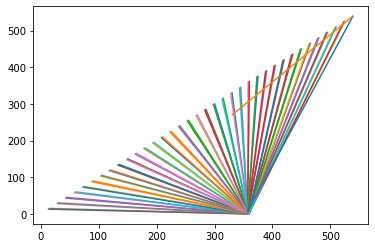

In [8]:
v_shape = np.shape(vertical)

for i in range(v_shape[0]):
    plt.plot(*vertical[i])

(375.0, 30.0)


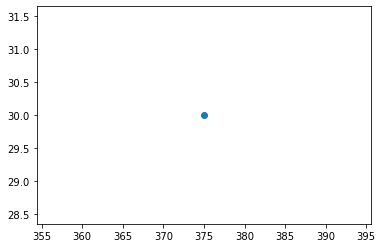

In [9]:
def get_intersect(a1, a2, b1, b2):
    """ 
    Returns the point of intersection of the lines passing through a2,a1 and b2,b1.
    a1: [x, y] a point on the first line
    a2: [x, y] another point on the first line
    b1: [x, y] a point on the second line
    b2: [x, y] another point on the second line
    """
    s = np.vstack([a1,a2,b1,b2])        # s for stacked
    h = np.hstack((s, np.ones((4, 1)))) # h for homogeneous
    l1 = np.cross(h[0], h[1])           # get first line
    l2 = np.cross(h[2], h[3])           # get second line
    x, y, z = np.cross(l1, l2)          # point of intersection
    if z == 0:                          # lines are parallel
        return (float('inf'), float('inf'))
    return (x/z, y/z)

if __name__ == "__main__":
    plt.scatter(*get_intersect(*vertical[0], *horizontal[0]))  # parallel  lines
    print(get_intersect(*vertical[0], *horizontal[0]))

In [50]:
x = []
y = []
for i in range(h_shape[0]):
    for j in range(v_shape[0]):
        xi, yi = get_intersect(*vertical[j], *horizontal[i])
        x.append(xi)
        y.append(yi) # parallel  lines

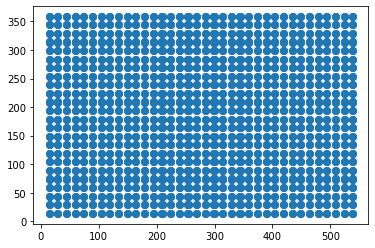

In [57]:
plt.scatter(x, y)

(12.5, 32.5)

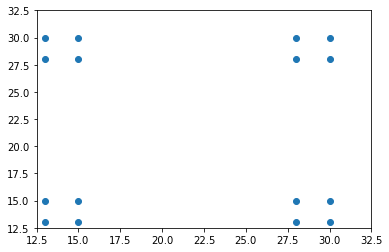

In [63]:
plt.scatter(x, y)
plt.xlim(12.5,32.5)
plt.ylim(12.5,32.5)

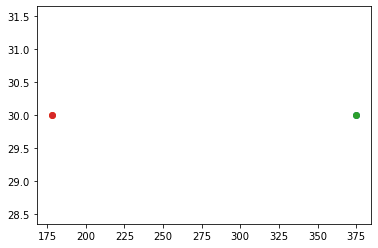

In [66]:
for i, valx in enumerate(x[0:1]):
    for j, valy in enumerate(y[0:1]):
        plt.scatter(x[i],y[j])
        plt.scatter(x[i + 1],y[j])
        plt.scatter(x[i],y[j + 1])
        plt.scatter(x[i + 1],y[j+1])


In [12]:
import pandas as pd

df = pd.DataFrame({'x': x, 'y': y})

df = df.sort_values('x')

df

,x,y
1125,13.0,58.0
3069,13.0,88.0
693,13.0,240.0
981,13.0,268.0
2133,13.0,330.0
...,...,...
2734,539.0,45.0
1150,539.0,58.0
1078,539.0,178.0
1006,539.0,268.0


In [13]:
x_vals = np.unique(df['x'].to_list())
y_vals = np.unique(df['y'].to_list())

In [14]:
#test.drop(df.index, inplace=True)

test = df.loc[df['x'] == x_vals[0]]

for i in x_vals:
    throw = df.loc[df['x'] == i]

    throw = throw.sort_values('y')
    #test.insert(df.loc[df['x'] == x_vals[1]])

    rowname = throw['x'].to_list()[0]
    test[f'{rowname}'] = list(zip(throw['x'], throw['y']))

test

/var/folders/6p/h1y3sh3s22dbsx_k6l69dsn00000gn/T/ipykernel_78614/1280268257.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'{rowname}'] = list(zip(throw['x'], throw['y']))
/var/folders/6p/h1y3sh3s22dbsx_k6l69dsn00000gn/T/ipykernel_78614/1280268257.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'{rowname}'] = list(zip(throw['x'], throw['y']))
/var/folders/6p/h1y3sh3s22dbsx_k6l69dsn00000gn/T/ipykernel_78614/1280268257.py:12: SettingWithCopyWarning: 
A value is trying to be set on a cop

/var/folders/6p/h1y3sh3s22dbsx_k6l69dsn00000gn/T/ipykernel_78614/1280268257.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'{rowname}'] = list(zip(throw['x'], throw['y']))
/var/folders/6p/h1y3sh3s22dbsx_k6l69dsn00000gn/T/ipykernel_78614/1280268257.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[f'{rowname}'] = list(zip(throw['x'], throw['y']))
/var/folders/6p/h1y3sh3s22dbsx_k6l69dsn00000gn/T/ipykernel_78614/1280268257.py:12: SettingWithCopyWarning: 
A value is trying to be set on a cop

,x,y,13.0,15.0,28.0,30.0,43.0,45.0,58.0,60.0,...,478.0,480.0,493.0,495.0,508.0,510.0,523.0,525.0,538.0,539.0
1125,13.0,58.0,"(13.0, 13.0)","(15.0, 13.0)","(28.0, 13.0)","(30.0, 13.0)","(43.0, 13.0)","(45.0, 13.0)","(58.0, 13.0)","(60.0, 13.0)",...,"(478.0, 13.0)","(480.0, 13.0)","(493.0, 13.0)","(495.0, 13.0)","(508.0, 13.0)","(510.0, 13.0)","(523.0, 13.0)","(525.0, 13.0)","(538.0, 13.0)","(539.0, 13.0)"
3069,13.0,88.0,"(13.0, 15.0)","(15.0, 15.0)","(28.0, 15.0)","(30.0, 15.0)","(43.0, 15.0)","(45.0, 15.0)","(58.0, 15.0)","(60.0, 15.0)",...,"(478.0, 15.0)","(480.0, 15.0)","(493.0, 15.0)","(495.0, 15.0)","(508.0, 15.0)","(510.0, 15.0)","(523.0, 15.0)","(525.0, 15.0)","(538.0, 15.0)","(539.0, 15.0)"
693,13.0,240.0,"(13.0, 28.0)","(15.0, 28.0)","(28.0, 28.0)","(30.0, 28.0)","(43.0, 28.0)","(45.0, 28.0)","(58.0, 28.0)","(60.0, 28.0)",...,"(478.0, 28.0)","(480.0, 28.0)","(493.0, 28.0)","(495.0, 28.0)","(508.0, 28.0)","(510.0, 28.0)","(523.0, 28.0)","(525.0, 28.0)","(538.0, 28.0)","(539.0, 28.0)"
981,13.0,268.0,"(13.0, 30.0)","(15.0, 30.0)","(28.0, 30.0)","(30.0, 30.0)","(43.0, 30.0)","(45.0, 30.0)","(58.0, 30.0)","(60.0, 30.0)",...,"(478.0, 30.0)","(480.0, 30.0)","(493.0, 30.0)","(495.0, 30.0)","(508.0, 30.0)","(510.0, 30.0)","(523.0, 30.0)","(525.0, 30.0)","(538.0, 30.0)","(539.0, 30.0)"
2133,13.0,330.0,"(13.0, 43.0)","(15.0, 43.0)","(28.0, 43.0)","(30.0, 43.0)","(43.0, 43.0)","(45.0, 43.0)","(58.0, 43.0)","(60.0, 43.0)",...,"(478.0, 43.0)","(480.0, 43.0)","(493.0, 43.0)","(495.0, 43.0)","(508.0, 43.0)","(510.0, 43.0)","(523.0, 43.0)","(525.0, 43.0)","(538.0, 43.0)","(539.0, 43.0)"
189,13.0,105.0,"(13.0, 45.0)","(15.0, 45.0)","(28.0, 45.0)","(30.0, 45.0)","(43.0, 45.0)","(45.0, 45.0)","(58.0, 45.0)","(60.0, 45.0)",...,"(478.0, 45.0)","(480.0, 45.0)","(493.0, 45.0)","(495.0, 45.0)","(508.0, 45.0)","(510.0, 45.0)","(523.0, 45.0)","(525.0, 45.0)","(538.0, 45.0)","(539.0, 45.0)"
117,13.0,300.0,"(13.0, 58.0)","(15.0, 58.0)","(28.0, 58.0)","(30.0, 58.0)","(43.0, 58.0)","(45.0, 58.0)","(58.0, 58.0)","(60.0, 58.0)",...,"(478.0, 58.0)","(480.0, 58.0)","(493.0, 58.0)","(495.0, 58.0)","(508.0, 58.0)","(510.0, 58.0)","(523.0, 58.0)","(525.0, 58.0)","(538.0, 58.0)","(539.0, 58.0)"
1989,13.0,103.0,"(13.0, 60.0)","(15.0, 60.0)","(28.0, 60.0)","(30.0, 60.0)","(43.0, 60.0)","(45.0, 60.0)","(58.0, 60.0)","(60.0, 60.0)",...,"(478.0, 60.0)","(480.0, 60.0)","(493.0, 60.0)","(495.0, 60.0)","(508.0, 60.0)","(510.0, 60.0)","(523.0, 60.0)","(525.0, 60.0)","(538.0, 60.0)","(539.0, 60.0)"
3141,13.0,165.0,"(13.0, 73.0)","(15.0, 73.0)","(28.0, 73.0)","(30.0, 73.0)","(43.0, 73.0)","(45.0, 73.0)","(58.0, 73.0)","(60.0, 73.0)",...,"(478.0, 73.0)","(480.0, 73.0)","(493.0, 73.0)","(495.0, 73.0)","(508.0, 73.0)","(510.0, 73.0)","(523.0, 73.0)","(525.0, 73.0)","(538.0, 73.0)","(539.0, 73.0)"
2421,13.0,43.0,"(13.0, 75.0)","(15.0, 75.0)","(28.0, 75.0)","(30.0, 75.0)","(43.0, 75.0)","(45.0, 75.0)","(58.0, 75.0)","(60.0, 75.0)",...,"(478.0, 75.0)","(480.0, 75.0)","(493.0, 75.0)","(495.0, 75.0)","(508.0, 75.0)","(510.0, 75.0)","(523.0, 75.0)","(525.0, 75.0)","(538.0, 75.0)","(539.0, 75.0)"


In [15]:
test

,x,y,13.0,15.0,28.0,30.0,43.0,45.0,58.0,60.0,...,478.0,480.0,493.0,495.0,508.0,510.0,523.0,525.0,538.0,539.0
1125,13.0,58.0,"(13.0, 13.0)","(15.0, 13.0)","(28.0, 13.0)","(30.0, 13.0)","(43.0, 13.0)","(45.0, 13.0)","(58.0, 13.0)","(60.0, 13.0)",...,"(478.0, 13.0)","(480.0, 13.0)","(493.0, 13.0)","(495.0, 13.0)","(508.0, 13.0)","(510.0, 13.0)","(523.0, 13.0)","(525.0, 13.0)","(538.0, 13.0)","(539.0, 13.0)"
3069,13.0,88.0,"(13.0, 15.0)","(15.0, 15.0)","(28.0, 15.0)","(30.0, 15.0)","(43.0, 15.0)","(45.0, 15.0)","(58.0, 15.0)","(60.0, 15.0)",...,"(478.0, 15.0)","(480.0, 15.0)","(493.0, 15.0)","(495.0, 15.0)","(508.0, 15.0)","(510.0, 15.0)","(523.0, 15.0)","(525.0, 15.0)","(538.0, 15.0)","(539.0, 15.0)"
693,13.0,240.0,"(13.0, 28.0)","(15.0, 28.0)","(28.0, 28.0)","(30.0, 28.0)","(43.0, 28.0)","(45.0, 28.0)","(58.0, 28.0)","(60.0, 28.0)",...,"(478.0, 28.0)","(480.0, 28.0)","(493.0, 28.0)","(495.0, 28.0)","(508.0, 28.0)","(510.0, 28.0)","(523.0, 28.0)","(525.0, 28.0)","(538.0, 28.0)","(539.0, 28.0)"
981,13.0,268.0,"(13.0, 30.0)","(15.0, 30.0)","(28.0, 30.0)","(30.0, 30.0)","(43.0, 30.0)","(45.0, 30.0)","(58.0, 30.0)","(60.0, 30.0)",...,"(478.0, 30.0)","(480.0, 30.0)","(493.0, 30.0)","(495.0, 30.0)","(508.0, 30.0)","(510.0, 30.0)","(523.0, 30.0)","(525.0, 30.0)","(538.0, 30.0)","(539.0, 30.0)"
2133,13.0,330.0,"(13.0, 43.0)","(15.0, 43.0)","(28.0, 43.0)","(30.0, 43.0)","(43.0, 43.0)","(45.0, 43.0)","(58.0, 43.0)","(60.0, 43.0)",...,"(478.0, 43.0)","(480.0, 43.0)","(493.0, 43.0)","(495.0, 43.0)","(508.0, 43.0)","(510.0, 43.0)","(523.0, 43.0)","(525.0, 43.0)","(538.0, 43.0)","(539.0, 43.0)"
189,13.0,105.0,"(13.0, 45.0)","(15.0, 45.0)","(28.0, 45.0)","(30.0, 45.0)","(43.0, 45.0)","(45.0, 45.0)","(58.0, 45.0)","(60.0, 45.0)",...,"(478.0, 45.0)","(480.0, 45.0)","(493.0, 45.0)","(495.0, 45.0)","(508.0, 45.0)","(510.0, 45.0)","(523.0, 45.0)","(525.0, 45.0)","(538.0, 45.0)","(539.0, 45.0)"
117,13.0,300.0,"(13.0, 58.0)","(15.0, 58.0)","(28.0, 58.0)","(30.0, 58.0)","(43.0, 58.0)","(45.0, 58.0)","(58.0, 58.0)","(60.0, 58.0)",...,"(478.0, 58.0)","(480.0, 58.0)","(493.0, 58.0)","(495.0, 58.0)","(508.0, 58.0)","(510.0, 58.0)","(523.0, 58.0)","(525.0, 58.0)","(538.0, 58.0)","(539.0, 58.0)"
1989,13.0,103.0,"(13.0, 60.0)","(15.0, 60.0)","(28.0, 60.0)","(30.0, 60.0)","(43.0, 60.0)","(45.0, 60.0)","(58.0, 60.0)","(60.0, 60.0)",...,"(478.0, 60.0)","(480.0, 60.0)","(493.0, 60.0)","(495.0, 60.0)","(508.0, 60.0)","(510.0, 60.0)","(523.0, 60.0)","(525.0, 60.0)","(538.0, 60.0)","(539.0, 60.0)"
3141,13.0,165.0,"(13.0, 73.0)","(15.0, 73.0)","(28.0, 73.0)","(30.0, 73.0)","(43.0, 73.0)","(45.0, 73.0)","(58.0, 73.0)","(60.0, 73.0)",...,"(478.0, 73.0)","(480.0, 73.0)","(493.0, 73.0)","(495.0, 73.0)","(508.0, 73.0)","(510.0, 73.0)","(523.0, 73.0)","(525.0, 73.0)","(538.0, 73.0)","(539.0, 73.0)"
2421,13.0,43.0,"(13.0, 75.0)","(15.0, 75.0)","(28.0, 75.0)","(30.0, 75.0)","(43.0, 75.0)","(45.0, 75.0)","(58.0, 75.0)","(60.0, 75.0)",...,"(478.0, 75.0)","(480.0, 75.0)","(493.0, 75.0)","(495.0, 75.0)","(508.0, 75.0)","(510.0, 75.0)","(523.0, 75.0)","(525.0, 75.0)","(538.0, 75.0)","(539.0, 75.0)"


[13.] [13.]
--------
[13.] [15.]
--------
[13.] [28.]
--------
[13.] [30.]
--------
[13.] [43.]
--------
[13.] [45.]
--------
[13.] [58.]
--------
[13.] [60.]
--------
[13.] [73.]
--------
[13.] [75.]
--------
[15.] [13.]
--------
[15.] [15.]
--------
[15.] [28.]
--------
[15.] [30.]
--------
[15.] [43.]
--------
[15.] [45.]
--------
[15.] [58.]
--------
[15.] [60.]
--------
[15.] [73.]
--------
[15.] [75.]
--------


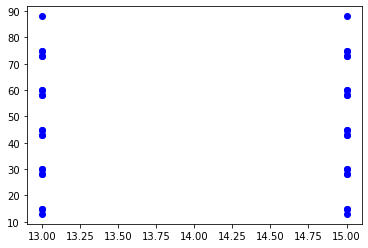

In [48]:
for i in x_vals[0:2]:
    n = 0
    for n in range(0,10):
        a, b = np.array(test[f'{i}'].to_list()).T
        print(a[n:n + 1], b[n:n + 1])
        print("--------")
        plt.scatter(a[n:n+2], b[n:n+2], color = "b")


In [17]:
def tile(filename, dir_in, dir_out, x, y):
    name, ext = os.path.splitext(filename)
    img = Image.open(os.path.join(dir_in, filename))
    w, h = img.size
    
    for i, j in zip(x, y):
        box = (j, i, j+d, i+d)
        out = os.path.join(dir_out, f'{name}_{i}_{j}{ext}')
        img.crop(box).save(out)


linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

cv.imshow("Source", src)
#cv.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
cv.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)

#cv.waitKey()


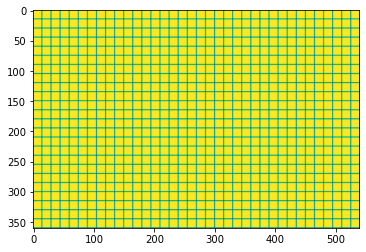

In [18]:
plt.imshow(src)
plt.show()

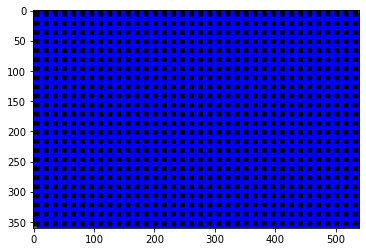

In [19]:
plt.imshow(cdstP)
plt.show()